In [5]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp, log10
import pandas as pd

# Exercise 1

In [6]:
def diff_equ(arg):
    """
    Function to calculate the value of the differential equation
    Args:
       arg: argument
 
    Returns: value of the differential equation
 
    """
    return arg * (arg - 1) * (arg - 2)

In [28]:
def euler_method(t_p: float, t_k: float, h: float, x_0: float, fun: callable):
    """
     Function to calculate the fixed points using the Euler method
      
    Args:
       t_p: start time
       t_k: end time
       h: step
       x_0: starting point
       fun: differential equation
  
    Returns: time points, fixed points
  
    """
    t_euler = np.arange(t_p, t_k, h)
    x_euler = [x_0] * len(t_euler)
    for idx in range(1, len(t_euler)):
        x_euler[idx] = x_euler[idx - 1] + h * fun(x_euler[idx - 1])
    return t_euler, x_euler, x_euler[-1]

In [27]:
def modified_euler(t_p, t_k, h, x_0, fun):
    """
    Function to calculate the fixed points using the modified Euler method
    Args:
      t_p: start time
      t_k: end time
      h: step size
      x_0: starting point
      fun: function to calculate the value of the differential equation
  
    Returns:
  
    """
    t_mod = np.arange(t_p, t_k, h)
    x_mod = [x_0] * len(t_mod)
    for t in range(1, len(t_mod)):
        x_mod[t] = x_mod[t - 1] + h * fun(x_mod[t - 1] + (h / 2) * fun(x_mod[t - 1]))
    return t_mod, x_mod, x_mod[-1]

In [21]:
euler_method(0, 4, 0.1, 1.4, diff_equ)[1]

[1.4,
 1.3663999999999998,
 1.3346788818943998,
 1.3049597303210705,
 1.277299896111273,
 1.2517022104952804,
 1.2281266236998007,
 1.2065011723486425,
 1.1867316325738386,
 1.1687095782927466,
 1.1523188172169878,
 1.1374403307194094,
 1.123955920295114,
 1.1117507874070116,
 1.1007152657147252,
 1.0907459003251414,
 1.0817460378938337,
 1.073626060197072,
 1.0663033653680754,
 1.0597021766941275,
 1.0537532389694797,
 1.048393446590914,
 1.0435654353173198,
 1.039217160274987,
 1.0353014757905012,
 1.0317757274608645,
 1.0286013630999884,
 1.0257435664900938,
 1.023170915947596,
 1.020855068379261,
 1.0187704685989096,
 1.0168940830798612,
 1.015205156945973,
 1.0136849927897353,
 1.012316749801976,
 1.0110852616697374,
 1.0099768717218138,
 1.0089792838573877,
 1.0080814278694046,
 1.0072733378618464]

In [22]:
modified_euler(0, 4, 0.1, 1.4, diff_equ)[1]

[1.4,
 1.3673069946368,
 1.33650492969509,
 1.307672169395556,
 1.28083229550946,
 1.2559651740687565,
 1.233017406138082,
 1.2119115838448424,
 1.19255409731557,
 1.1748414612914695,
 1.1586652655069443,
 1.1439159218100656,
 1.1304854047570878,
 1.1182691785237584,
 1.1071674842396306,
 1.0970861367992604,
 1.0879369540439923,
 1.0796379168003538,
 1.072113136933336,
 1.0652926927241113,
 1.0591123763963872,
 1.0535133871281592,
 1.048441993939663,
 1.0438491859849433,
 1.0396903225762515,
 1.0359247913793634,
 1.0325156803379694,
 1.02942946677847,
 1.0266357256248972,
 1.0241068575711507,
 1.0218178373019555,
 1.0197459813393446,
 1.017870734753402,
 1.0161734757659506,
 1.0146373371576218,
 1.0132470433354763,
 1.0119887619102539,
 1.0108499686549308,
 1.0098193247589848,
 1.0088865653480275]

In [40]:
def get_data(starting_points:list, method:callable):
    """
    Function to calculate the fixed points for different starting points
    Args:
       starting_points: list of different starting points
       method: type of numerical method to calculate the fixed points
  
    Returns: DataFrame with fixed points for different starting points
  
    """
    result = []
    for starting_point in starting_points:
        result.append(method(0, 4, 0.01, starting_point, diff_equ)[2])
    data = {"point": starting_points, "wynik": result}
    df = pd.DataFrame(data)
    return df

In [50]:
get_data([-0.000001, 0.991, 1.999999], modified_euler)

,point,wynik
0,-0.000001,-0.002933
1,0.991000,0.999833
2,1.999999,1.997092


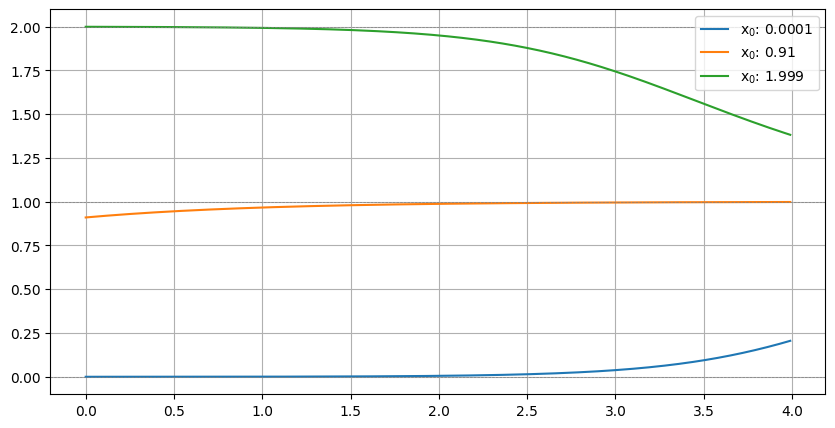

In [45]:
plt.figure(figsize=(10, 5))
for point in [0.0001, 0.91, 1.999]:
    time, fixed_points = modified_euler(0, 4, 0.01, point, diff_equ)[:2]
    plt.plot(time, fixed_points, label=f"x$_0$: {point}")
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axhline(1, color='grey', lw=0.5, ls='--')
plt.axhline(2, color='grey', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()

Stability analysis: x* = 1.0 is a stable point, x* = 0.0 and x* = 2.0 are unstable points.

# Exercise 2

In [53]:
def RK4_method(t_p: int, t_k: int, h: float, x_0: float, fun: callable):
    """
    Function to calculate the fixed points using the Runge-Kutta method
    Args:
      t_p: start time
      t_k: end time
      h: step size
      x_0: starting point
      fun: function to calculate the value of the differential equation
  
    Returns: fixed points, time points, last fixed point
  
    """
    t_RK4 = np.arange(t_p, t_k, h)
    x_RK4 = [x_0] * len(t_RK4)
    for t in range(len(t_RK4)):
        k1 = fun(x_RK4[t - 1])
        k2 = fun(x_RK4[t - 1] + (h * k1 / 2))
        k3 = fun(x_RK4[t - 1] + (h * k2 / 2))
        k4 = fun(x_RK4[t - 1] + (h * k3))
        x_RK4[t] = x_RK4[t - 1] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return t_RK4, x_RK4, x_RK4[-1]

In [54]:
RK4_method(0, 4, 0.1, 1.4, diff_equ)[1]

[1.3673005987877707,
 1.33648720390051,
 1.3076395888093117,
 1.2807827611079179,
 1.2558978738371265,
 1.2329325913376386,
 1.2118103157658064,
 1.1924380020425982,
 1.1747125140443297,
 1.1585256140131692,
 1.1437677501048615,
 1.1303308341195506,
 1.1181102000247256,
 1.1070059167366586,
 1.0969236044975639,
 1.0877748784814212,
 1.0794775190136068,
 1.071955446451817,
 1.0651385608319623,
 1.0589624917694922,
 1.0533682924881906,
 1.0483021027834265,
 1.043714798762291,
 1.0395616419227163,
 1.035801936177968,
 1.0323986985034586,
 1.0293183467388183,
 1.026530406529119,
 1.0240072382867202,
 1.0217237842852418,
 1.0196573354726435,
 1.017787317245548,
 1.0160950932123778,
 1.0145637858517584,
 1.0131781129176554,
 1.0119242384337,
 1.010789637141393,
 1.0097629713096001,
 1.0088339788682343,
 1.0079933718917313]